In [4]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [5]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [6]:
train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

# adding prefential attachment as feature

In [7]:
def pref_attachment(a,b):
    try:
       x=len(list(train_graph.predecessors(a)))
       y=len(list(train_graph.predecessors(b)) )    

       return x*y
    except:
        return 0

In [8]:
pref_attachment(1,189226)

9

# svd dot product of source and destination as feature

In [9]:
df_final_train['svddot1']=df_final_train['svd_u_s_1']*df_final_train['svd_u_d_1']+df_final_train['svd_u_s_2']*df_final_train['svd_u_d_2']+df_final_train['svd_u_s_3']*df_final_train['svd_u_d_3']+df_final_train['svd_u_s_4']*df_final_train['svd_u_d_4']+df_final_train['svd_u_s_5']*df_final_train['svd_u_d_5']+df_final_train['svd_u_s_6']*df_final_train['svd_u_d_6']
df_final_train['svddot2']=df_final_train['svd_v_s_1']*df_final_train['svd_v_d_1']+df_final_train['svd_v_s_2']*df_final_train['svd_v_d_2']+df_final_train['svd_v_s_3']*df_final_train['svd_v_d_3']+df_final_train['svd_v_s_4']*df_final_train['svd_v_d_4']+df_final_train['svd_v_s_5']*df_final_train['svd_v_d_5']+df_final_train['svd_v_s_6']*df_final_train['svd_v_d_6']

In [10]:
df_final_test['svddot1']=df_final_test['svd_u_s_1']*df_final_test['svd_u_d_1']+df_final_test['svd_u_s_2']*df_final_test['svd_u_d_2']+df_final_test['svd_u_s_3']*df_final_test['svd_u_d_3']+df_final_test['svd_u_s_4']*df_final_test['svd_u_d_4']+df_final_test['svd_u_s_5']*df_final_test['svd_u_d_5']+df_final_test['svd_u_s_6']*df_final_test['svd_u_d_6']
df_final_test['svddot2']=df_final_test['svd_v_s_1']*df_final_test['svd_v_d_1']+df_final_test['svd_v_s_2']*df_final_test['svd_v_d_2']+df_final_test['svd_v_s_3']*df_final_test['svd_v_d_3']+df_final_test['svd_v_s_4']*df_final_test['svd_v_d_4']+df_final_test['svd_v_s_5']*df_final_test['svd_v_d_5']+df_final_test['svd_v_s_6']*df_final_test['svd_v_d_6']

In [11]:
df_final_train['pref_attachment'] = df_final_train.apply(lambda row:
                                            pref_attachment(row['source_node'],row['destination_node']),axis=1)
df_final_test['pref_attachment'] = df_final_test.apply(lambda row:
                                            pref_attachment(row['source_node'],row['destination_node']),axis=1)

In [12]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svddot1', 'svddot2', 'pref_attachment'],
      dtype='object')

In [13]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [14]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

# xgboost with hyparameter tuning

In [15]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
x_cfl=xgb.XGBClassifier()

prams={
   
     'n_estimators':[1,10,100,1000],
     'max_depth':[2,3,4,5,6]
    
}
grid_cfl1=GridSearchCV(x_cfl,param_grid=prams)
grid_cfl1.fit( df_final_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 10, 100, 1000], 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print (grid_cfl1.best_params_)

{'max_depth': 4, 'n_estimators': 1000}


In [17]:
clf=xgb.XGBClassifier(n_estimators= 1000, max_depth= 4)
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [18]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9978797879787978
Test f1 score 0.901569062697221


In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


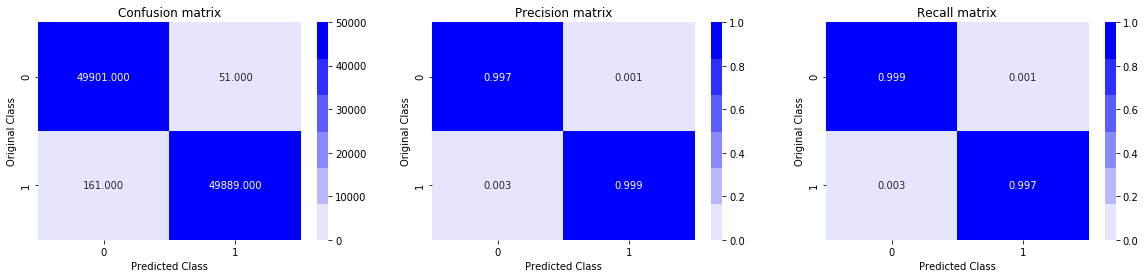

Test confusion_matrix


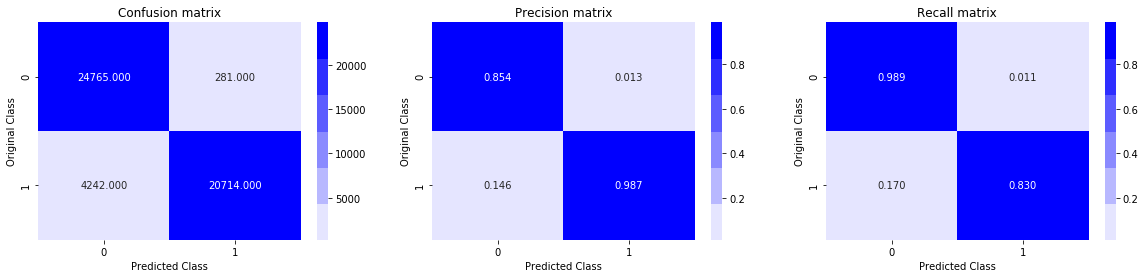

In [20]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

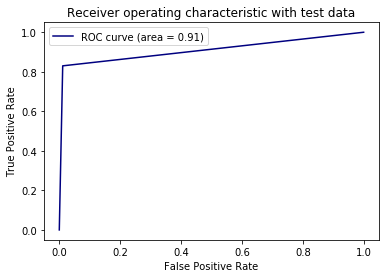

In [21]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()